# ChessBase 2018 full dataset

In [1]:
%matplotlib inline

In [2]:
import collections
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, timezone
from kseval.models import iterate_dataset
from kseval.models.chess import EloModel, TrueSkillModel
from math import log

DATASET = "kdd-chess-full.txt"

## Summary statistics

In [3]:
counter = collections.Counter()
n_obs = 0
for obs in iterate_dataset(DATASET):
    counter[obs["white"]] += 1
    counter[obs["black"]] += 1
    n_obs += 1

In [4]:
print("number of observations: {:,}".format(n_obs))
print("number of players:      {:,}".format(len(counter)))

number of observations: 7,169,202
number of players:      343,668


Text(0.5, 0, 'player ID')

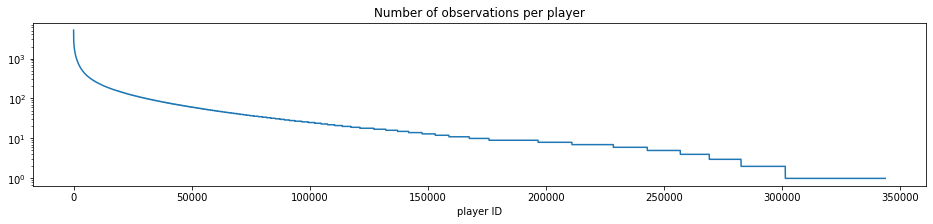

In [5]:
fig, ax = plt.subplots(figsize=(16.0, 3.0))
ax.semilogy(sorted(counter.values(), reverse=True))
ax.set_title("Number of observations per player")
ax.set_xlabel("player ID")

In [6]:
ts = list()
counter = collections.Counter()
for obs in iterate_dataset(DATASET):
    dt = datetime.fromtimestamp(obs["t"], tz=timezone.utc)
    counter[dt.year] += 1
    ts.append(obs["t"])

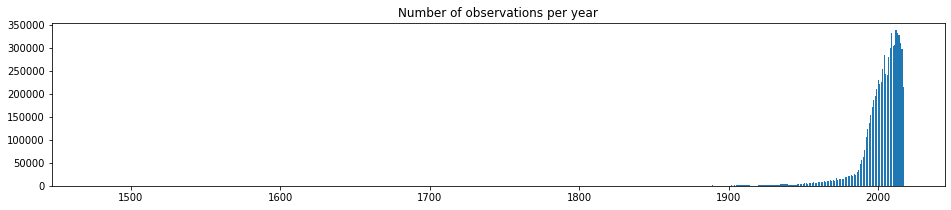

In [7]:
begin, end = min(counter), max(counter)
indices = np.arange(begin, end + 1, dtype=int)
counts = [counter[y] for y in indices]

fig, ax = plt.subplots(figsize=(16.0, 3.0))
ax.bar(indices, counts)
ax.set_title("Number of observations per year");

In [8]:
begin, end

(1475, 2017)